In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

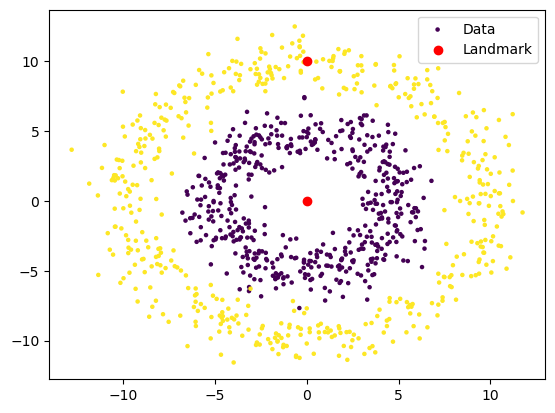

In [62]:
data_points = 500
r_inner = 5
#R1 and R2 need to be constant, theta need to be constant
R1 = np.random.randn(data_points) + r_inner
theta1 = np.random.choice(360, size = data_points) * np.pi / 180
x1 = (R1 * np.cos(theta1)).reshape(-1, 1)
y1 = (R1 * np.sin(theta1)).reshape(-1, 1)

r_outer = 10
R2 = np.random.randn(data_points) + r_outer
theta2 = np.random.choice(360, size = data_points) * np.pi / 180
x2 = (R2 * np.cos(theta2)).reshape(-1, 1)
y2 = (R2 * np.sin(theta2)).reshape(-1, 1)

X = np.vstack((np.hstack([x1, y1]), np.hstack([x2, y2])))
T = np.array([0] * data_points + [1] * data_points)

landmark_points = np.array([[0, 0], 
                            [0, 10]])

plt.scatter(X[:, 0], X[:, 1], c = T, s= 5, label = 'Data')
plt.scatter(landmark_points[:, 0], landmark_points[:, 1], c = 'red', label = 'Landmark')
plt.legend(loc='upper right')

In [63]:
phi = np.empty((data_points * 2, 0))
for (x, y) in landmark_points :
    transformation_X = np.sqrt(((X - (x, y)) ** 2).sum(axis = 1)).reshape(-1, 1)
    phi = np.concatenate((phi, transformation_X), axis = 1)
    
phi

array([[ 3.03354058, 10.14201862],
       [ 5.20669491, 10.69667902],
       [ 4.48128889,  8.67577439],
       ...,
       [10.08807661, 10.64532082],
       [ 8.05636647,  9.5788707 ],
       [10.31244896, 19.86867941]])

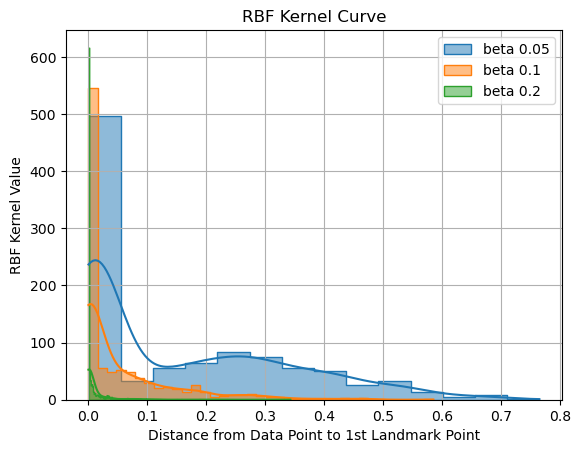

In [111]:
beta_1 = 0.05
beta_2 = 0.1
beta_3 = 0.2
K_rbf1 = np.exp(-beta_1 * (phi ** 2))
K_rbf2 = np.exp(-beta_2 * (phi ** 2))
K_rbf3 = np.exp(-beta_3 * (phi ** 2))

# Create subplots
fig, ax = plt.subplots()

sns.histplot(K_rbf1[:, 0], kde='kde', element = 'step', label = f'beta {beta_1}', ax = ax)
sns.histplot(K_rbf2[:, 0], kde='kde', element = 'step', label = f'beta {beta_2}', ax = ax)
sns.histplot(K_rbf3[:, 0], kde='kde', element = 'step', label = f'beta {beta_3}', ax = ax)

plt.xlabel('Distance from Data Point to 1st Landmark Point')
plt.ylabel('RBF Kernel Value')
plt.title('RBF Kernel Curve')
plt.grid(True)
plt.legend()


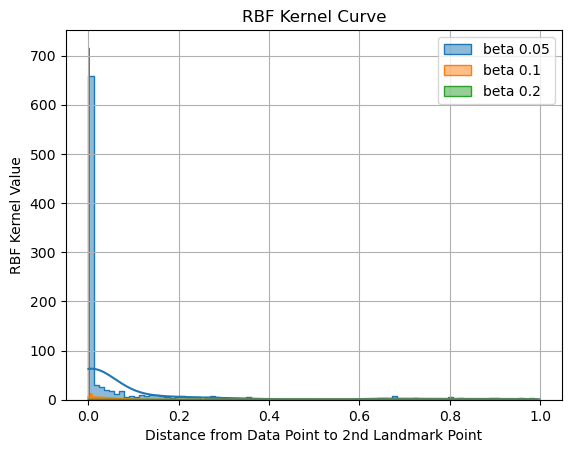

In [109]:
beta_1 = 0.05
beta_2 = 0.1
beta_3 = 0.2
K_rbf1 = np.exp(-beta_1 * (phi ** 2))
K_rbf2 = np.exp(-beta_2 * (phi ** 2))
K_rbf3 = np.exp(-beta_3 * (phi ** 2))

# Create subplots
fig, ax = plt.subplots()

sns.histplot(K_rbf1[:, 1], kde='kde', element = 'step', label = f'beta {beta_1}', ax = ax)
sns.histplot(K_rbf2[:, 1], kde='kde', element = 'step', label = f'beta {beta_2}', ax = ax)
sns.histplot(K_rbf3[:, 1], kde='kde', element = 'step', label = f'beta {beta_3}', ax = ax)

plt.xlabel('Distance from Data Point to 2nd Landmark Point')
plt.ylabel('RBF Kernel Value')
plt.title('RBF Kernel Curve')
plt.grid(True)
plt.legend()
